# Lego Multiple Linear Regression

## Obtaining Data

The data has been provided to us as two database files, lego.db and Walmart.db, and a csv, economy_data.csv. We will pull all the data from these files, combine them where possible, and save the combined datasets to csv.

In [1]:
import sqlite3
import pandas as pd

First, we need to get the info on all the tables from the database.

In [2]:
def print_table_data(database_name):
    con = sqlite3.connect(database_name)
    cur = con.cursor()
    cur.execute("""SELECT name
                   FROM sqlite_master
                   WHERE type='table'
                   ORDER BY name;
                """)
    tables = [t[0] for t in cur.fetchall()]
    for table in tables:
        print(f'Table: {table}\nInfo:')
        cur.execute(f"""SELECT *
                        FROM {table};
                     """)
        df = pd.DataFrame(cur.fetchall())
        df.columns = [c[0] for c in cur.description]
        print(df.info())

In [3]:
print_table_data('data/lego.db')

Table: product_details
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 4 columns):
prod_id           744 non-null int64
prod_desc         744 non-null object
prod_long_desc    744 non-null object
theme_name        744 non-null object
dtypes: int64(1), object(3)
memory usage: 23.4+ KB
None
Table: product_info
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 4 columns):
prod_id        744 non-null int64
ages           744 non-null object
piece_count    744 non-null int64
set_name       744 non-null object
dtypes: int64(2), object(2)
memory usage: 23.4+ KB
None
Table: product_pricing
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 3 columns):
prod_id       10870 non-null int64
country       10870 non-null object
list_price    10870 non-null object
dtypes: int64(1), object(2)
memory usage: 254.9+ KB
None
Table: product_reviews
Info:
<class

All the tables use the same 'prod_id' value as their key, so combining is an easy join statement. After printing out some of the details of our new table, we save it to a csv so it can be easily read into a pandas dataframe later.

In [4]:
con = sqlite3.connect('data/lego.db')
cur = con.cursor()
cur.execute("""SELECT *
               FROM product_info
               JOIN product_details
               USING(prod_id)
               JOIN product_pricing
               USING(prod_id)
               JOIN product_reviews
               USING(prod_id);
            """)
lego_df = pd.DataFrame(cur.fetchall())
lego_df.columns = [c[0] for c in cur.description]
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 14 columns):
prod_id              10870 non-null int64
ages                 10870 non-null object
piece_count          10870 non-null int64
set_name             10870 non-null object
prod_desc            10870 non-null object
prod_long_desc       10870 non-null object
theme_name           10870 non-null object
country              10870 non-null object
list_price           10870 non-null object
num_reviews          9449 non-null float64
play_star_rating     9321 non-null float64
review_difficulty    10870 non-null object
star_rating          9449 non-null float64
val_star_rating      9301 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


In [5]:
lego_df

,prod_id,ages,piece_count,set_name,prod_desc,prod_long_desc,theme_name,country,list_price,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,75823,6-12,277,Bird Island Egg Heist,blah,blahblah,Angry Birds™,US,29.99,2.0,4.0,Average,4.5,4.0
1,75822,6-12,168,Piggy Plane Attack,blah,blahblah,Angry Birds™,US,19.99,2.0,4.0,Easy,5.0,4.0
2,75821,6-12,74,Piggy Car Escape,blah,blahblah,Angry Birds™,US,12.99,11.0,4.3,Easy,4.3,4.1
3,21030,12+,1032,United States Capitol Building,blah,blahblah,Architecture,US,99.99,23.0,3.6,Average,4.6,4.3
4,21035,12+,744,Solomon R. Guggenheim Museum®,blah,blahblah,Architecture,US,79.99,14.0,3.2,Challenging,4.6,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,70903,7-14,254,The Riddler™ Riddle Racer,blah,blahblah,THE LEGO® BATMAN MOVIE,PT,42.6878,18.0,4.2,Easy,4.2,4.4
10866,70910,7-14,204,Scarecrow™ Special Delivery,blah,blahblah,THE LEGO® BATMAN MOVIE,PT,30.4878,8.0,4.1,Average,4.4,4.1
10867,70901,7-14,201,Mr. Freeze™ Ice Attack,blah,blahblah,THE LEGO® BATMAN MOVIE,PT,30.4878,19.0,4.1,Easy,4.6,4.4
10868,70913,6-12,141,Scarecrow™ Fearful Face-off,blah,blahblah,THE LEGO® BATMAN MOVIE,PT,18.2878,7.0,4.0,Easy,4.1,4.4


In [6]:
lego_df.to_csv('data/lego.csv')

Next, we do the same thing with the Walmart.db data. Again, the two tables use the same 'Store' value as an id, so they can be easily joined.

In [7]:
print_table_data('data/Walmart.db')

Table: sales
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452192 entries, 0 to 452191
Data columns (total 5 columns):
Store           452192 non-null int64
Dept            452192 non-null int64
Date            452192 non-null object
Weekly_Sales    452192 non-null float64
IsHoliday       452192 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 17.2+ MB
None
Table: store_details
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [8]:
con = sqlite3.connect('data/Walmart.db')
cur = con.cursor()
cur.execute("""SELECT *
               FROM sales
               JOIN store_details
               USING(Store);
            """)
walmart_df = pd.DataFrame(cur.fetchall())
walmart_df.columns = [c[0] for c in cur.description]
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452192 entries, 0 to 452191
Data columns (total 7 columns):
Store           452192 non-null int64
Dept            452192 non-null int64
Date            452192 non-null object
Weekly_Sales    452192 non-null float64
IsHoliday       452192 non-null object
Type            452192 non-null object
Size            452192 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 24.1+ MB


In [9]:
walmart_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
452187,45,98,2012-09-28,508.37,False,B,118221
452188,45,98,2012-10-05,628.10,False,B,118221
452189,45,98,2012-10-12,1061.02,False,B,118221
452190,45,98,2012-10-19,760.01,False,B,118221


Finally, there is an economy_data.csv file. It has unique 'Store' and 'Date' values, similar to our walmart_df. We can merge the two dataframes and save the result as walmart.csv

In [10]:
economy_df = pd.read_csv('data/economy_data.csv')
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
economy_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [12]:
walmart_combined_df = pd.merge(walmart_df, economy_df,  how='left', on=['Store','Date'])
walmart_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452192 entries, 0 to 452191
Data columns (total 17 columns):
Store           452192 non-null int64
Dept            452192 non-null int64
Date            452192 non-null object
Weekly_Sales    452192 non-null float64
IsHoliday_x     452192 non-null object
Type            452192 non-null object
Size            452192 non-null int64
Temperature     452192 non-null float64
Fuel_Price      452192 non-null float64
MarkDown1       161614 non-null float64
MarkDown2       120077 non-null float64
MarkDown3       147431 non-null float64
MarkDown4       145762 non-null float64
MarkDown5       162365 non-null float64
CPI             452192 non-null float64
Unemployment    452192 non-null float64
IsHoliday_y     452192 non-null bool
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 59.1+ MB


In [13]:
walmart_combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452187,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
452188,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
452189,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
452190,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [14]:
walmart_combined_df.to_csv('data/walmart.csv')

## Scrubbing and Cleaning Data

In order to begin the data cleaning process, we will import the necessary pacakges, and then will load the relevant dataset that was created above, "data/lego.csv", as a DataFrame.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
df = pd.read_csv('data/lego.csv', index_col=0)
df.head()

,prod_id,ages,piece_count,set_name,prod_desc,prod_long_desc,theme_name,country,list_price,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,75823,6-12,277,Bird Island Egg Heist,blah,blahblah,Angry Birds™,US,29.99,2.0,4.0,Average,4.5,4.0
1,75822,6-12,168,Piggy Plane Attack,blah,blahblah,Angry Birds™,US,19.99,2.0,4.0,Easy,5.0,4.0
2,75821,6-12,74,Piggy Car Escape,blah,blahblah,Angry Birds™,US,12.99,11.0,4.3,Easy,4.3,4.1
3,21030,12+,1032,United States Capitol Building,blah,blahblah,Architecture,US,99.99,23.0,3.6,Average,4.6,4.3
4,21035,12+,744,Solomon R. Guggenheim Museum®,blah,blahblah,Architecture,US,79.99,14.0,3.2,Challenging,4.6,4.1


### Starting our Data Cleaning

The first step will be to check the data types of each column.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10870 entries, 0 to 10869
Data columns (total 14 columns):
prod_id              10870 non-null int64
ages                 10870 non-null object
piece_count          10870 non-null int64
set_name             10870 non-null object
prod_desc            10870 non-null object
prod_long_desc       10870 non-null object
theme_name           10870 non-null object
country              10870 non-null object
list_price           10870 non-null float64
num_reviews          9449 non-null float64
play_star_rating     9321 non-null float64
review_difficulty    9104 non-null object
star_rating          9449 non-null float64
val_star_rating      9301 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ MB


We'll now investigate some of the unique values inside of the `list_price` column.

In [17]:
df['list_price'].nunique()

733

In [18]:
df['list_price'].unique()[:10]

array([ 29.99,  19.99,  12.99,  99.99,  79.99,  59.99,  49.99,  39.99,
        34.99, 159.99])

Our next step will be to identify any null values in the dataset and deal with them accordingly.

In [19]:
df.isna().sum()

prod_id                 0
ages                    0
piece_count             0
set_name                0
prod_desc               0
prod_long_desc          0
theme_name              0
country                 0
list_price              0
num_reviews          1421
play_star_rating     1549
review_difficulty    1766
star_rating          1421
val_star_rating      1569
dtype: int64

In [20]:
df.describe()

,prod_id,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
count,1.087000e+04,10870.000000,10870.000000,9449.000000,9321.000000,9449.000000,9301.000000
mean,6.181634e+04,503.936431,67.309137,17.813737,4.355413,4.510319,4.214439
std,1.736390e+05,831.209318,94.669414,38.166693,0.617272,0.516463,0.670906
min,6.300000e+02,1.000000,2.272400,1.000000,1.000000,1.800000,1.000000
25%,2.112300e+04,97.000000,21.899000,2.000000,4.000000,4.300000,4.000000
50%,4.207350e+04,223.000000,36.587800,6.000000,4.500000,4.600000,4.300000
75%,7.124800e+04,556.000000,73.187800,14.000000,4.800000,5.000000,4.700000
max,2.000431e+06,7541.000000,1104.870000,367.000000,5.000000,5.000000,5.000000


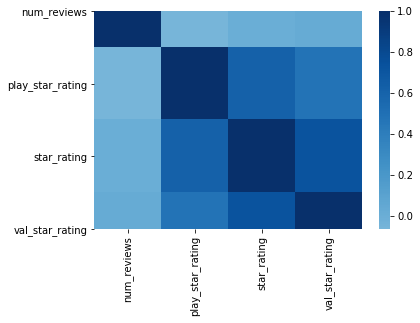

In [21]:
df_new = df.loc[:, ('num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating')]
sns.heatmap(df_new.corr(), center=0, cmap="Blues");

Here we see that play_star_rating, star_rating, and val_star_rating appear to be highly correlated.

In [22]:
len(df[(df.play_star_rating.isnull()) & (df.val_star_rating.isnull())& (df.star_rating.isnull())])

1421

In [23]:
df['play_star_rating'] = df['play_star_rating'].fillna(df['play_star_rating'].median())

In [24]:
df['star_rating'] = df['star_rating'].fillna(df['star_rating'].median())

In [25]:
df['val_star_rating'] = df['val_star_rating'].fillna(df['val_star_rating'].median())

In [26]:
df['review_difficulty'] = df['review_difficulty'].fillna(value="unknown")

### Normalizing the data

Our next step will be to normalize the data by converting values to their corresponding z scores.

In [27]:
def normalize(value):
    value = np.log(value)
    z = (value - value.min()) / (value.max() - value.min())
    return z

In [28]:
numeric = ['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']

for col in numeric:
    df[col] = normalize(df[col]) 

In [29]:
df.describe()

,prod_id,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
count,1.087000e+04,10870.000000,10870.000000,9449.000000,10870.000000,10870.000000,10870.000000
mean,6.181634e+04,0.593099,67.309137,0.317276,0.910304,0.894979,0.887175
std,1.736390e+05,0.178828,94.669414,0.223133,0.099761,0.120300,0.109792
min,6.300000e+02,0.000000,2.272400,0.000000,0.000000,0.000000,0.000000
25%,2.112300e+04,0.512394,21.899000,0.117376,0.876695,0.852373,0.861353
50%,4.207350e+04,0.605635,36.587800,0.303412,0.934536,0.918385,0.906288
75%,7.124800e+04,0.707963,73.187800,0.446892,0.961555,0.980225,0.948192
max,2.000431e+06,1.000000,1104.870000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.to_csv("Lego_cleaned.csv", index=False)

### One-Hot Coding Categorial Columns

We will now convert the categorial variables to dummy variables.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10870 entries, 0 to 10869
Data columns (total 14 columns):
prod_id              10870 non-null int64
ages                 10870 non-null object
piece_count          10870 non-null float64
set_name             10870 non-null object
prod_desc            10870 non-null object
prod_long_desc       10870 non-null object
theme_name           10870 non-null object
country              10870 non-null object
list_price           10870 non-null float64
num_reviews          9449 non-null float64
play_star_rating     10870 non-null float64
review_difficulty    10870 non-null object
star_rating          10870 non-null float64
val_star_rating      10870 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.2+ MB


In [32]:
categorial = ['ages', 'theme_name', 'country', 'review_difficulty']
df_new = df[categorial]
df_new = pd.get_dummies(df_new, drop_first=True)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10870 entries, 0 to 10869
Data columns (total 93 columns):
ages_10-14                                          10870 non-null uint8
ages_10-16                                          10870 non-null uint8
ages_10-21                                          10870 non-null uint8
ages_11-16                                          10870 non-null uint8
ages_12+                                            10870 non-null uint8
ages_12-16                                          10870 non-null uint8
ages_14+                                            10870 non-null uint8
ages_16+                                            10870 non-null uint8
ages_1½-3                                           10870 non-null uint8
ages_1½-5                                           10870 non-null uint8
ages_2-5                                            10870 non-null uint8
ages_4+                                             10870 non-null uint8
ages_4-7       

## Exploring Data

To further explore the data, we need to merge the DataFrame with dummy values in the categorical columns with the DataFrame containig the normalized values in the remaining relevant columns (as well as **list_price**, which is the target variable for our model). 

In [34]:
new_cols = ['piece_count','list_price','num_reviews','play_star_rating','star_rating','val_star_rating']
df = df[new_cols]
df_final = pd.concat([df, df_new], axis=1, join='inner')
df_final.describe()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10-14,ages_10-16,ages_10-21,ages_11-16,...,country_NO,country_NZ,country_PL,country_PT,country_US,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
count,10870.000000,10870.000000,9449.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,...,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000
mean,0.593099,67.309137,0.317276,0.910304,0.894979,0.887175,0.001932,0.013615,0.016927,0.006072,...,0.044802,0.046274,0.043330,0.044618,0.066421,0.091536,0.351978,0.001932,0.083257,0.162466
std,0.178828,94.669414,0.223133,0.099761,0.120300,0.109792,0.043913,0.115894,0.129005,0.077688,...,0.206879,0.210088,0.203609,0.206474,0.249029,0.288384,0.477609,0.043913,0.276282,0.368894
min,0.000000,2.272400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.512394,21.899000,0.117376,0.876695,0.852373,0.861353,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.605635,36.587800,0.303412,0.934536,0.918385,0.906288,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.707963,73.187800,0.446892,0.961555,0.980225,0.948192,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1104.870000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, we'll explore the distributions of the data in each column by plotting historgrams for all the numerical variables in our dataset. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb6fa85860>,
      dtype=object)

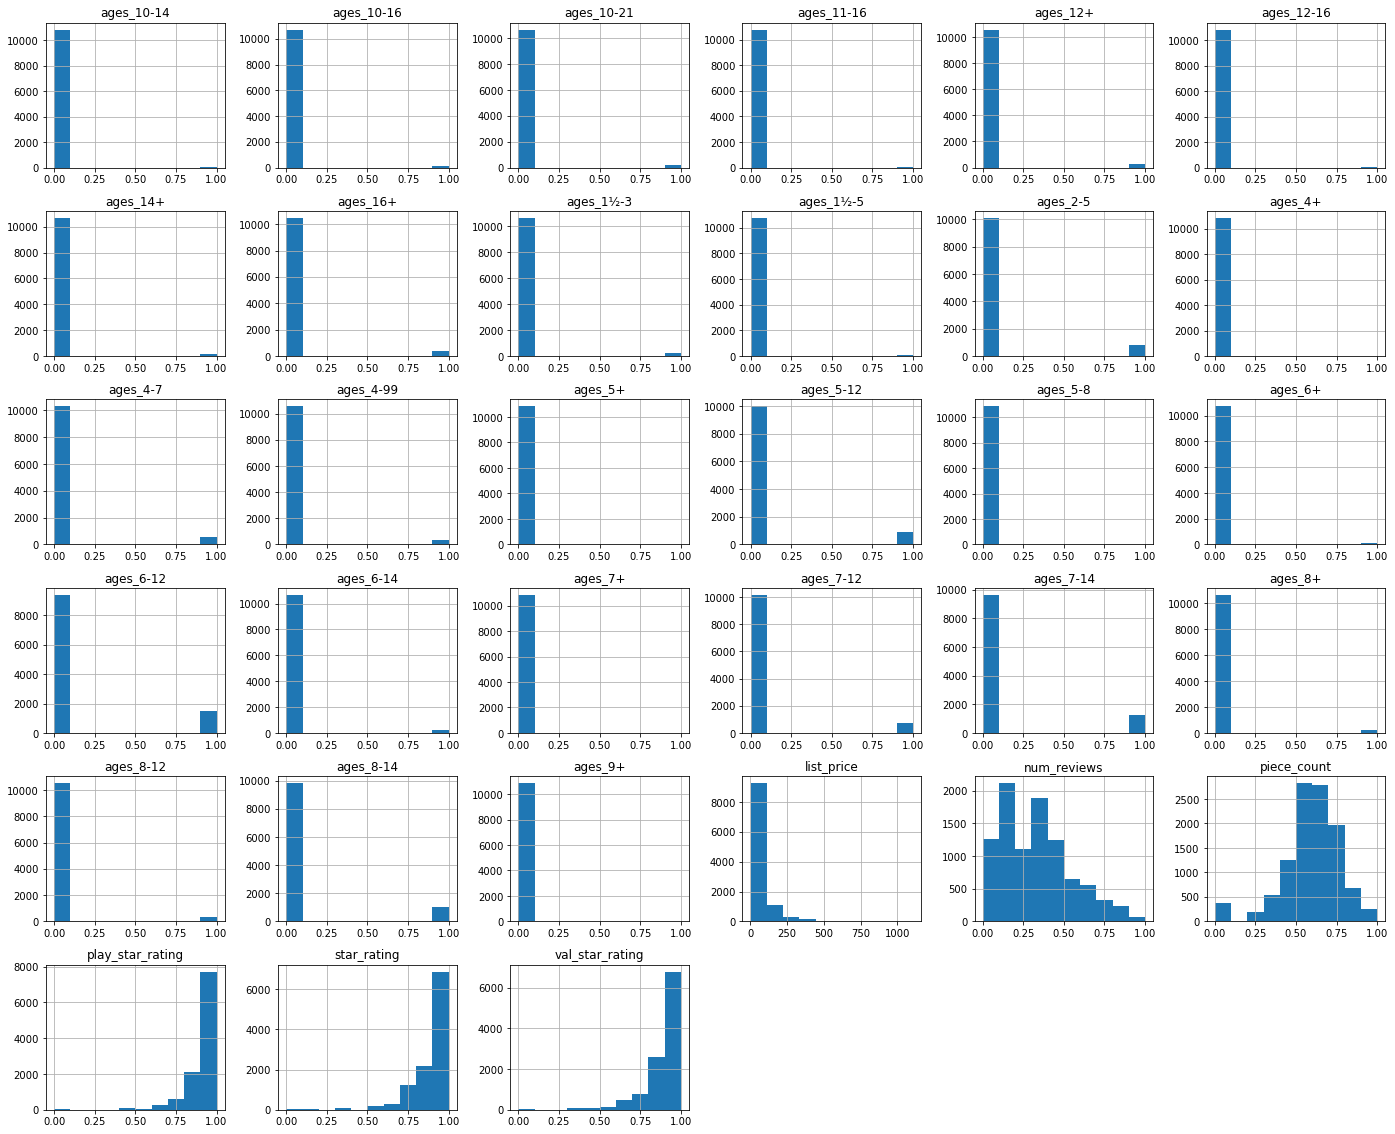

In [35]:
#To avoid clutter and keep the plots easy for observation, we'll plot the histograms in three groups of 33 
df_final[df_final.columns[:33]].hist(figsize = (24,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb76cc6a20>,
      dtype=object)

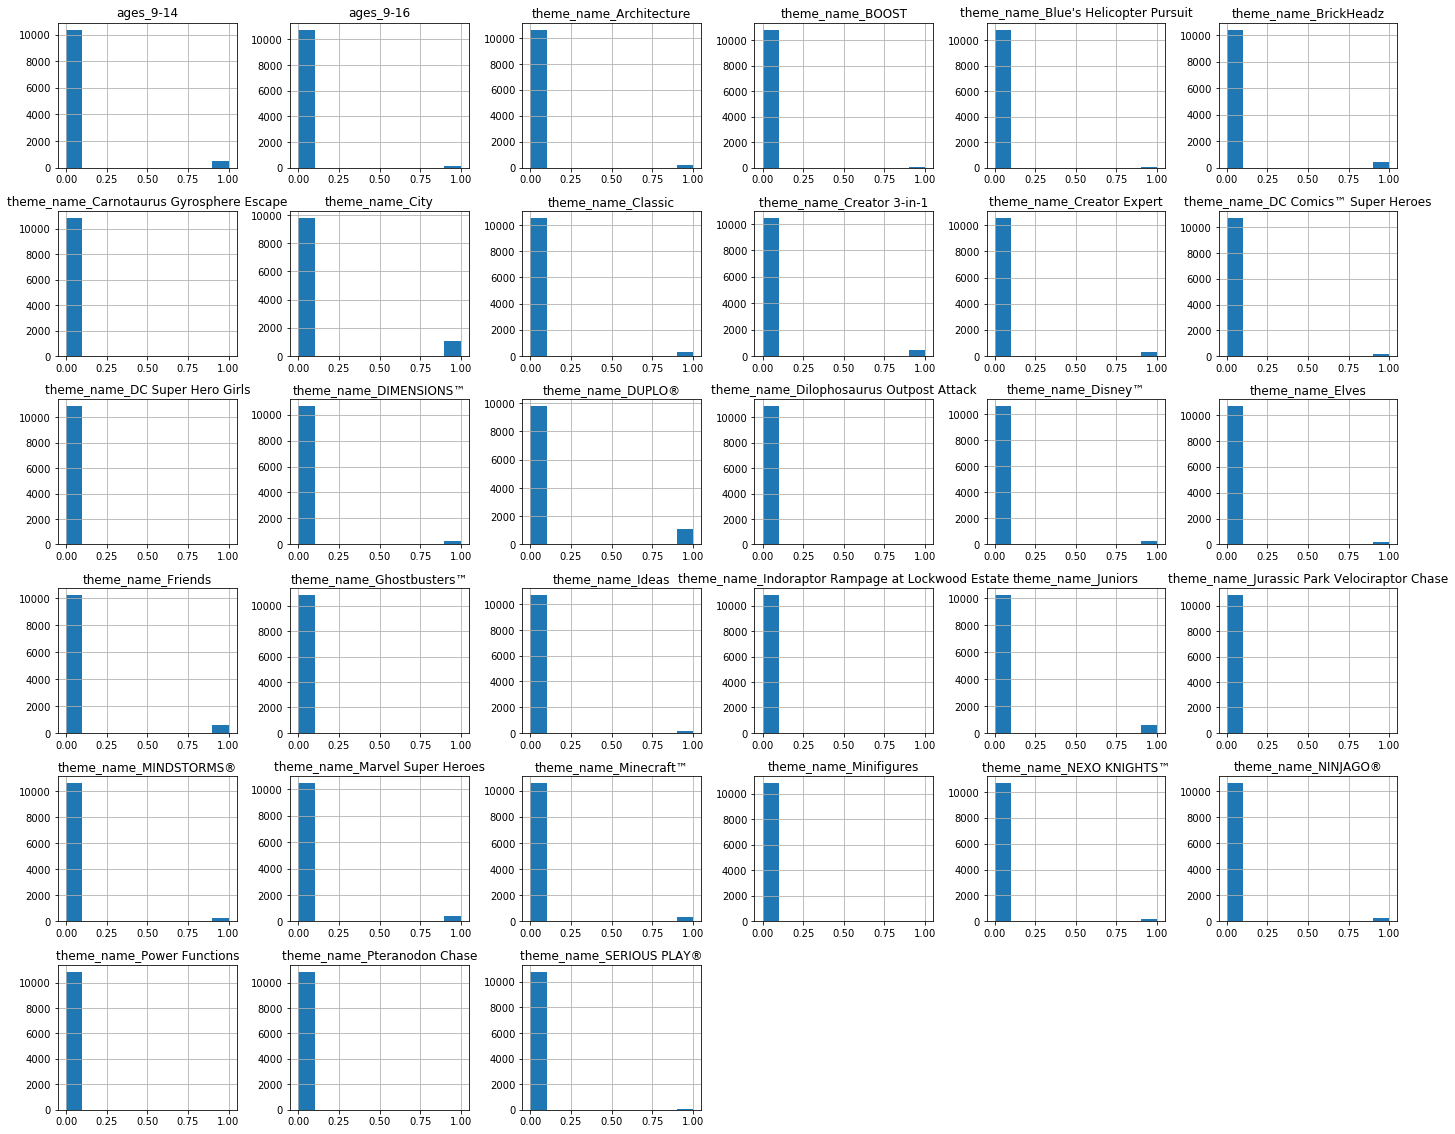

In [36]:
df_final[df_final.columns[34:67]].hist(figsize = (24,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb74862ba8>,
      dtype=object)

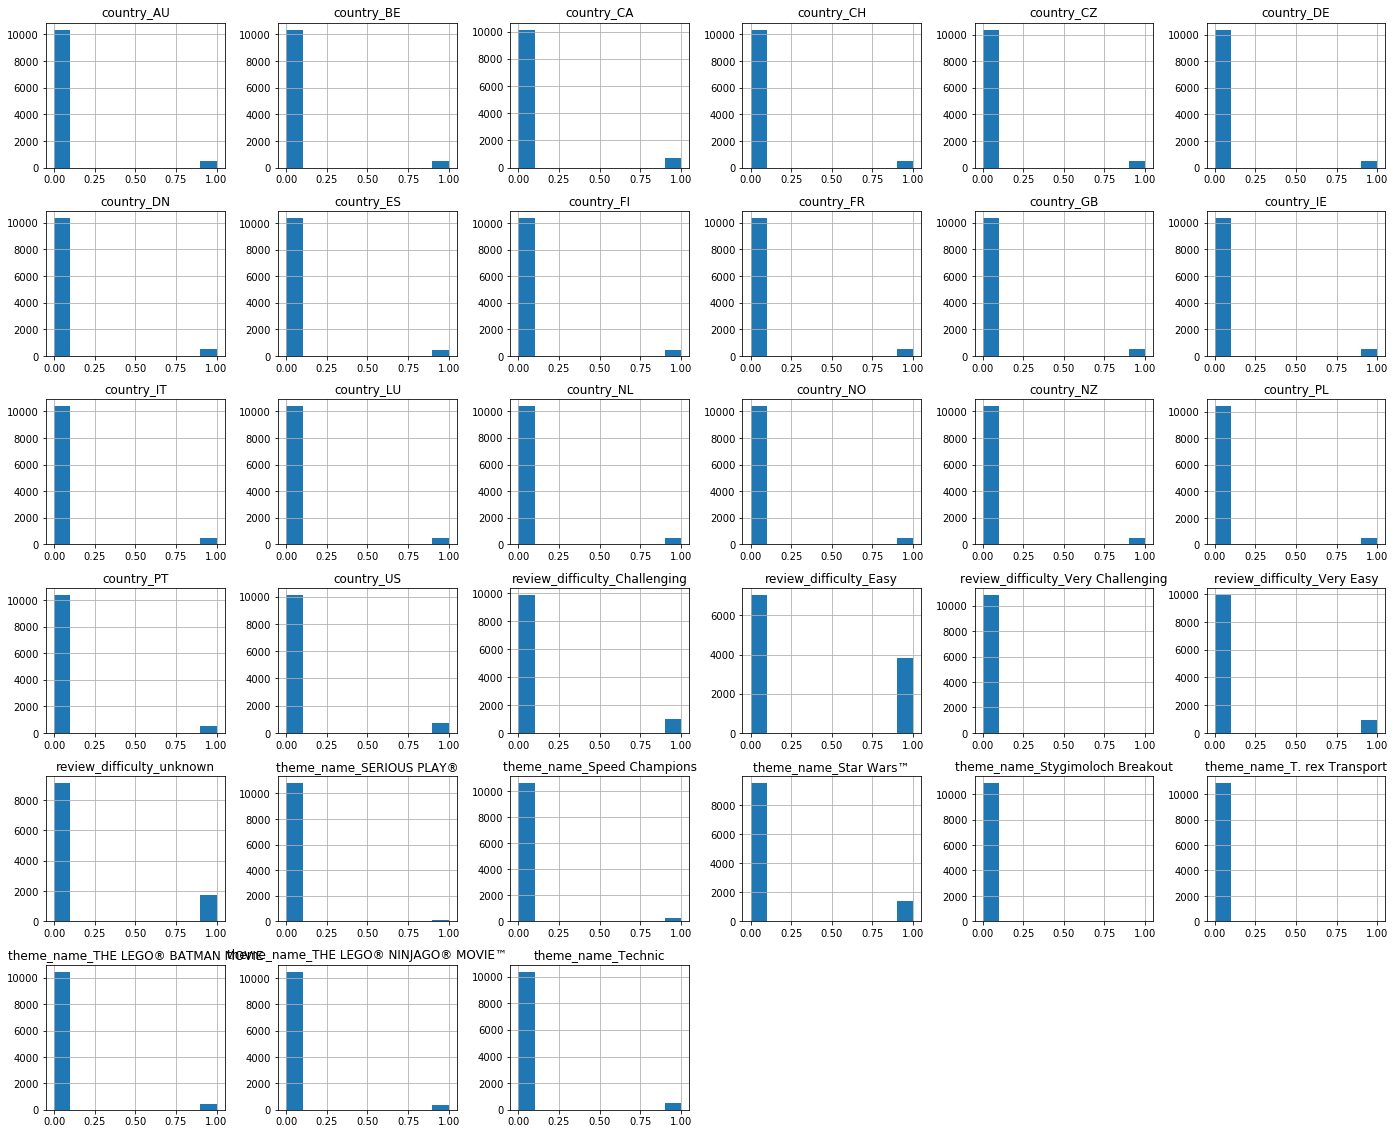

In [37]:
df_final[df_final.columns[66:99]].hist(figsize = (24,20))

**Observation:** All columns containing dummy values follow a Bernoulli distribution (as expected) and the remaining predictor columns with normalized values are pretty skewed. 

### Checking for Linearity
We'll use joint plots to investigate if there's a linear relationship between the predictor variables and our target variable.

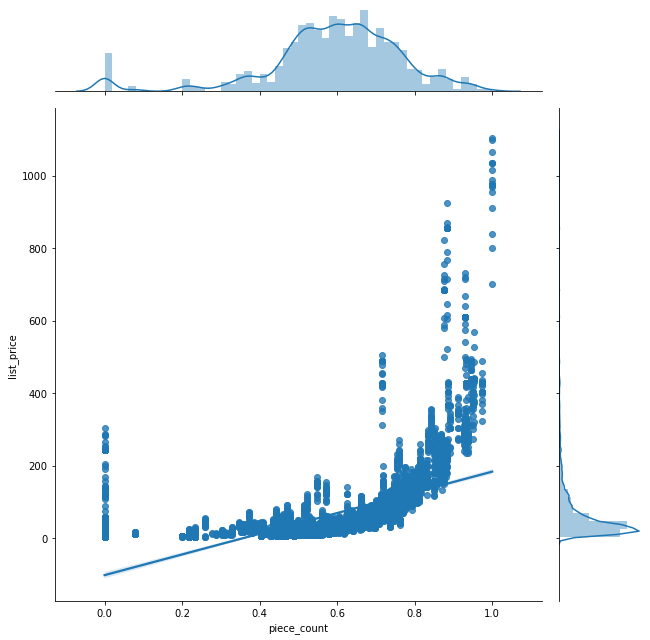

In [38]:
import warnings
warnings.filterwarnings('ignore')

sns.jointplot(x = 'piece_count', y = 'list_price', data=df_final, kind='reg',height = 9)

**Observation:** It appears that piece count has a linear relationship with our target list price. The more pieces a lego set has, the higher the price.

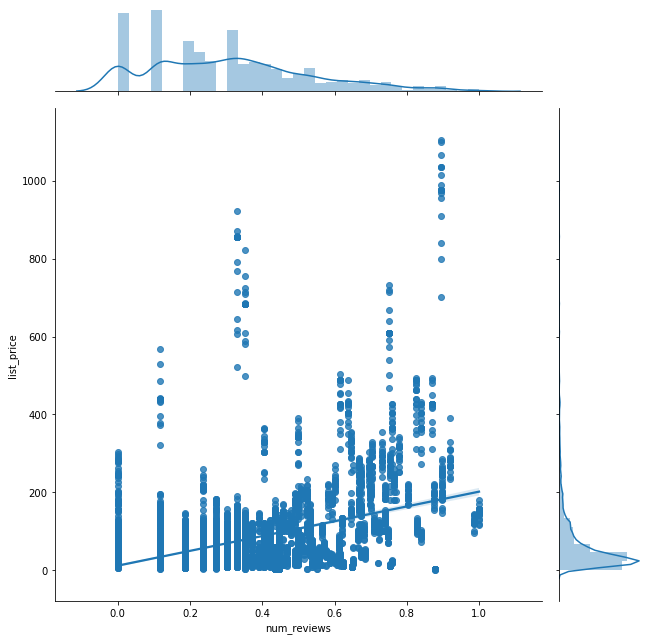

In [39]:
sns.jointplot(x = 'num_reviews', y = 'list_price', data=df_final, kind='reg',height = 9)

**Observation** There seems to be a much weaker linear relationship between the prices of a lego set and the number of reviews it has received. 95% of the lego sets cost under $220, which explains why most reviewes are skewed in ther lower left lower left quadrant, which adds a lot of noise to the visualiztion of the relationship. 

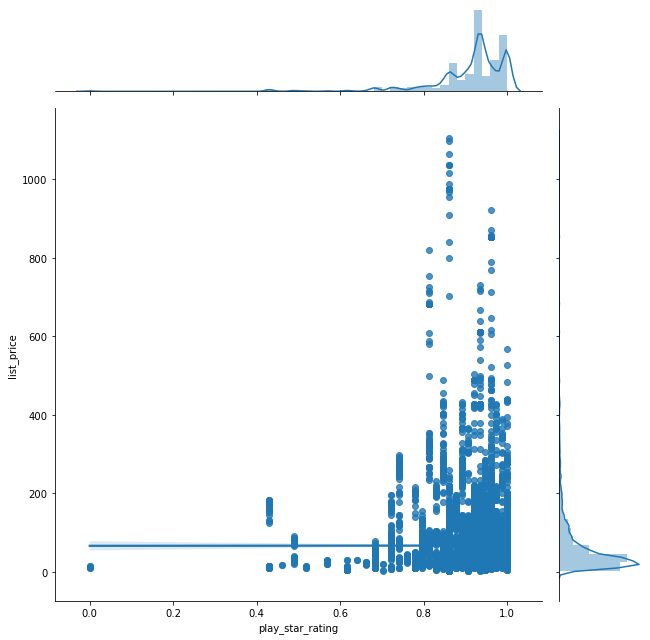

In [40]:
sns.jointplot(x = 'play_star_rating', y = 'list_price', data=df_final, kind='reg',height = 9)

**Observation:** List price and play star rating don't have a linear relationship.

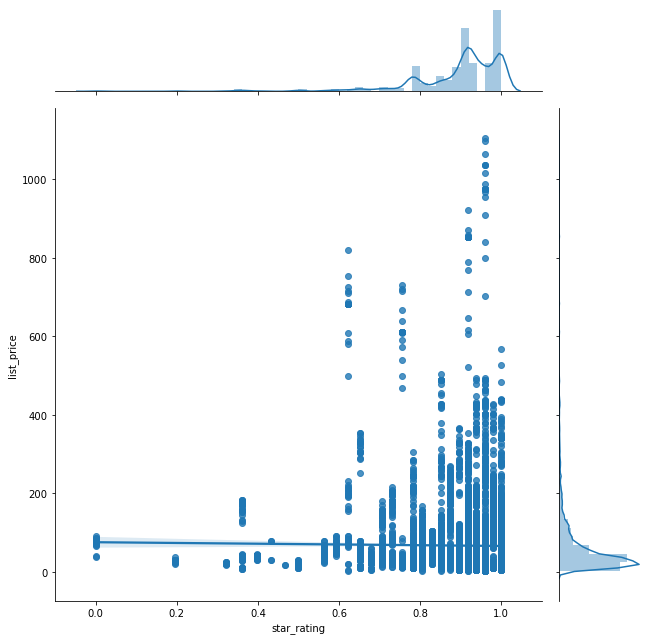

In [41]:
sns.jointplot(x = 'star_rating', y = 'list_price', data=df_final, kind='reg',height = 9)

**Observation:** List price and star rating also don't have a linear relationship.

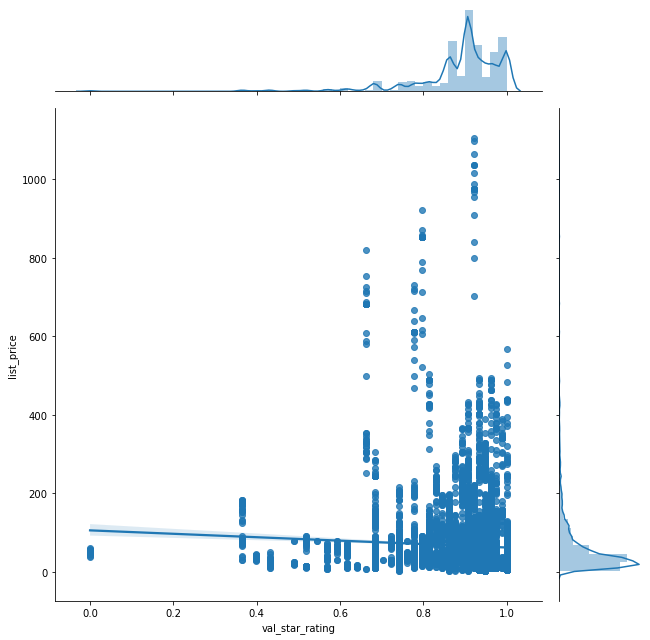

In [42]:
sns.jointplot(x = 'val_star_rating', y = 'list_price', data=df_final, kind='reg',height = 9)

**Observation:** List price and the val star rating don't have a linear relationship as well.
    
Conclusion: None of the rating variables have a linear relationship with our target variable, so it's best to exclude them from the model.

### Checking for Multicollinearity
Next, we'll check if the predictive features will result in multicollinearity in our model. We are looking for predictors that have a r<65 pairwise correlation.  

In [43]:
feats = ['piece_count', 'num_reviews', 'play_star_rating','star_rating','val_star_rating']
corr = df_final[feats].corr()
corr

,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating
piece_count,1.000000,0.354806,-0.009953,0.048696,0.082236
num_reviews,0.354806,1.000000,-0.073132,-0.130305,-0.032830
play_star_rating,-0.009953,-0.073132,1.000000,0.594517,0.449088
star_rating,0.048696,-0.130305,0.594517,1.000000,0.706829
val_star_rating,0.082236,-0.032830,0.449088,0.706829,1.000000


**Observation:** The two predictors that remain (after excluding all ratings due to a lack of linear relationship with the target variable) are **piece count** and **number of reviews**. They have a relatively high correlation (0.54). Perhaps only one of them is worth keeping, e.g. piece count which has a stronger lienar relationsihp with our dependent variable.

## Modeling Data

Re-formatting column names to ensure their don't produce an error when plugged into the formula syntax. 

In [44]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col


df_final.columns = [col_formatting(col) for col in df_final.columns]

In [45]:
df_final.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10_14', 'ages_10_16',
       'ages_10_21', 'ages_11_16', 'ages_12plus', 'ages_12_16', 'ages_14plus',
       'ages_16plus', 'ages_1half_3', 'ages_1half_5', 'ages_2_5', 'ages_4plus',
       'ages_4_7', 'ages_4_99', 'ages_5plus', 'ages_5_12', 'ages_5_8',
       'ages_6plus', 'ages_6_12', 'ages_6_14', 'ages_7plus', 'ages_7_12',
       'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9plus',
       'ages_9_12', 'ages_9_14', 'ages_9_16', 'theme_name_Architecture',
       'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit',
       'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape',
       'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_3_in_1',
       'theme_name_Creator_Expert', 'theme_name_DC_Comics_Super_Heroes',
       'theme_name_DC_Super_Hero_Girls', 'theme_name_DIMENSIONS',
       'theme_name_DUPLO', 'theme_name_Dilophosauru

### Building an Initial Regression Model

In [46]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [47]:
train, test = train_test_split(df_final)
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8152 entries, 7465 to 4927
Data columns (total 99 columns):
piece_count                                         8152 non-null float64
list_price                                          8152 non-null float64
num_reviews                                         7084 non-null float64
play_star_rating                                    8152 non-null float64
star_rating                                         8152 non-null float64
val_star_rating                                     8152 non-null float64
ages_10_14                                          8152 non-null uint8
ages_10_16                                          8152 non-null uint8
ages_10_21                                          8152 non-null uint8
ages_11_16                                          8152 non-null uint8
ages_12plus                                         8152 non-null uint8
ages_12_16                                          8152 non-null uint8
ages_14plus   

In [48]:
X = train.drop('list_price', axis=1)

In [49]:
formula = 'list_price~' + '+'.join(X.columns) 

In [50]:
model = ols(formula=formula, data=train).fit()

In [51]:
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     293.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:28:52   Log-Likelihood:                -37232.
No. Observations:                7084   AIC:                         7.465e+04
Df Residuals:                    6992   BIC:                         7.528e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           59.9483     24.579      2.439      0.015      11.765     108.131
piece_count                                        296.7747      7.216     41.128      0.000     282.629     310.920
num_reviews                                         32.4825      4.153      7.822      0.000      24.342      40.623
play_star_rating                                    59.8367      8.163      7.330      0.000      43.834      75.839
star_rating                                         -4.9512      7.892     -0.627      0.530     -20.423      10.520
val_star_rating                                    -96.3072      7.814    -12.324      0.000    -111.626     -80.989
ages_10_14                                        -194.1715     14.929    -13.006      0.000    -223.437    -164.906
ages_10_16                                        -116.6008     11.353    -10.270      0.000    -138.856     -94.345
ages_10_21                                          14.5731      8.893      1.639      0.101      -2.860      32.006
ages_11_16                                         -46.8216     12.807     -3.656      0.000     -71.927     -21.716
ages_12plus                                         54.7981      9.627      5.692      0.000      35.927      73.669
ages_12_16                                         -53.3224     13.648     -3.907      0.000     -80.076     -26.569
ages_14plus                                          0.9516     10.488      0.091      0.928     -19.609      21.512
ages_16plus                                        185.7551     11.259     16.498      0.000     163.683     207.827
ages_1half_3                                       -26.2590      8.872     -2.960      0.003     -43.651      -8.867
ages_1half_5                                       -25.8360      7.965     -3.244      0.001     -41.450     -10.222
ages_2_5                                           -22.9438      6.743     -3.402      0.001     -36.163      -9.725
ages_4plus                                          16.4699     11.365      1.449      0.147      -5.808      38.748
ages_4_7                                           -42.2515      8.909     -4.742      0.000     -59.717     -24.786
ages_4_99                                          -84.5521      8.995     -9.400      0.000    -102.184     -66.920
ages_5plus                                         -57.4873     12.621     -4.555      0.000     -82.228     -32.747
ages_5_12                                         -161.8546     10.907    -14.840      0.000    -183.235    -140.474
ages_5_8                                           -66.0714     10.889     -6.068      0.000     -87.417     -44.726
ages_6plus                               

In [52]:
ptable = summary.tables[1]
df_p = pd.DataFrame(ptable.data)
df_p.head()

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,Intercept,59.9483,24.579,2.439,0.015,11.765,108.131
2,piece_count,296.7747,7.216,41.128,0.000,282.629,310.920
3,num_reviews,32.4825,4.153,7.822,0.000,24.342,40.623
4,play_star_rating,59.8367,8.163,7.330,0.000,43.834,75.839


In [53]:
df_p.drop(0, inplace=True)


In [54]:
df_p[4] = df_p[4].map(lambda x: float(x))

In [55]:
relevant_list = list(df_p[df_p[4] < .05][0][1:])
print(relevant_list)

['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10_14', 'ages_10_16', 'ages_11_16', 'ages_12plus', 'ages_12_16', 'ages_16plus', 'ages_1half_3', 'ages_1half_5', 'ages_2_5', 'ages_4_7', 'ages_4_99', 'ages_5plus', 'ages_5_12', 'ages_5_8', 'ages_6plus', 'ages_6_12', 'ages_6_14', 'ages_7plus', 'ages_7_12', 'ages_7_14', 'ages_8plus', 'ages_8_12', 'ages_8_14', 'ages_9_12', 'ages_9_14', 'ages_9_16', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit', 'theme_name_BrickHeadz', 'theme_name_Classic', 'theme_name_Creator_Expert', 'theme_name_DUPLO', 'theme_name_Ghostbusters', 'theme_name_Ideas', 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate', 'theme_name_Juniors', 'theme_name_Minecraft', 'theme_name_Minifigures', 'theme_name_NINJAGO', 'theme_name_SERIOUS_PLAY', 'country_CA', 'country_DN', 'country_FI', 'country_NO', 'country_US', 'review_difficulty_Challenging', 'review_difficulty_Easy', 'review_difficulty_Very_Easy']


In [56]:
formula = 'list_price~' + '+'.join(relevant_list) 

In [57]:
model2 = ols(formula=formula, data=train).fit()

In [58]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     520.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:28:52   Log-Likelihood:                -37436.
No. Observations:                7084   AIC:                         7.497e+04
Df Residuals:                    7035   BIC:                         7.531e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           99.6241      7.152     13.930      0.000      85.604     113.644
piece_count                                        250.0107      5.273     47.413      0.000     239.674     260.347
num_reviews                                         35.7169      3.552     10.056      0.000      28.755      42.679
play_star_rating                                    71.8748      7.089     10.139      0.000      57.978      85.771
val_star_rating                                   -111.9404      6.138    -18.239      0.000    -123.972     -99.909
ages_10_14                                        -206.6077     11.481    -17.996      0.000    -229.114    -184.102
ages_10_16                                        -151.5610      5.700    -26.588      0.000    -162.736    -140.386
ages_11_16                                         -85.3762      7.947    -10.743      0.000    -100.955     -69.797
ages_12plus                                         47.8098      7.278      6.569      0.000      33.542      62.077
ages_12_16                                         -82.3144      9.721     -8.468      0.000    -101.370     -63.259
ages_16plus                                        166.9756      6.613     25.251      0.000     154.013     179.939
ages_1half_3                                       -30.3233      6.803     -4.457      0.000     -43.660     -16.987
ages_1half_5                                       -35.9979      5.503     -6.541      0.000     -46.786     -25.209
ages_2_5                                           -26.5800      3.504     -7.585      0.000     -33.450     -19.710
ages_4_7                                           -50.4442      4.522    -11.157      0.000     -59.308     -41.581
ages_4_99                                          -77.8030     12.575     -6.187      0.000    -102.454     -53.152
ages_5plus                                         -72.7259      4.828    -15.064      0.000     -82.190     -63.262
ages_5_12                                         -179.0999      3.858    -46.427      0.000    -186.662    -171.538
ages_5_8                                           -66.5418      7.800     -8.531      0.000     -81.832     -51.251
ages_6plus                                        -178.1970      7.771    -22.930      0.000    -193.431    -162.963
ages_6_12                                         -182.3128      3.638    -50.115      0.000    -189.444    -175.182
ages_6_14                                         -166.7702      6.754    -24.691      0.000    -180.011    -153.530
ages_7plus                                        1.262e-13   1.57e-14      8.025      0.000    9.54e-14    1.57e-13
ages_7_12                                

In [59]:
p_table2 = summary.tables[1]
p_table2 = pd.DataFrame(p_table2.data)
p_table2.columns = p_table2.iloc[0]
p_table2 = p_table2.drop(0)
p_table2 = p_table2.set_index(p_table2.columns[0])
p_table2['P>|t|'] = p_table2['P>|t|'].astype(float)
x_cols = list(p_table2[p_table2['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table2), len(x_cols))
print(x_cols[:5])
p_table2.head()

99 53
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10_14']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,59.9483,24.579,2.439,0.015,11.765,108.131
piece_count,296.7747,7.216,41.128,0.000,282.629,310.920
num_reviews,32.4825,4.153,7.822,0.000,24.342,40.623
play_star_rating,59.8367,8.163,7.330,0.000,43.834,75.839
star_rating,-4.9512,7.892,-0.627,0.530,-20.423,10.520


In [60]:
formula = 'list_price~' + '+'.join(x_cols) 
model3 = ols(formula=formula, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     520.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:28:53   Log-Likelihood:                -37436.
No. Observations:                7084   AIC:                         7.497e+04
Df Residuals:                    7035   BIC:                         7.531e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           99.6241      7.152     13.930      0.000      85.604     113.644
piece_count                                        250.0107      5.273     47.413      0.000     239.674     260.347
num_reviews                                         35.7169      3.552     10.056      0.000      28.755      42.679
play_star_rating                                    71.8748      7.089     10.139      0.000      57.978      85.771
val_star_rating                                   -111.9404      6.138    -18.239      0.000    -123.972     -99.909
ages_10_14                                        -206.6077     11.481    -17.996      0.000    -229.114    -184.102
ages_10_16                                        -151.5610      5.700    -26.588      0.000    -162.736    -140.386
ages_11_16                                         -85.3762      7.947    -10.743      0.000    -100.955     -69.797
ages_12plus                                         47.8098      7.278      6.569      0.000      33.542      62.077
ages_12_16                                         -82.3144      9.721     -8.468      0.000    -101.370     -63.259
ages_16plus                                        166.9756      6.613     25.251      0.000     154.013     179.939
ages_1half_3                                       -30.3233      6.803     -4.457      0.000     -43.660     -16.987
ages_1half_5                                       -35.9979      5.503     -6.541      0.000     -46.786     -25.209
ages_2_5                                           -26.5800      3.504     -7.585      0.000     -33.450     -19.710
ages_4_7                                           -50.4442      4.522    -11.157      0.000     -59.308     -41.581
ages_4_99                                          -77.8030     12.575     -6.187      0.000    -102.454     -53.152
ages_5plus                                         -72.7259      4.828    -15.064      0.000     -82.190     -63.262
ages_5_12                                         -179.0999      3.858    -46.427      0.000    -186.662    -171.538
ages_5_8                                           -66.5418      7.800     -8.531      0.000     -81.832     -51.251
ages_6plus                                        -178.1970      7.771    -22.930      0.000    -193.431    -162.963
ages_6_12                                         -182.3128      3.638    -50.115      0.000    -189.444    -175.182
ages_6_14                                         -166.7702      6.754    -24.691      0.000    -180.011    -153.530
ages_7plus                                        1.262e-13   1.57e-14      8.025      0.000    9.54e-14    1.57e-13
ages_7_12                                

## Check for Normality

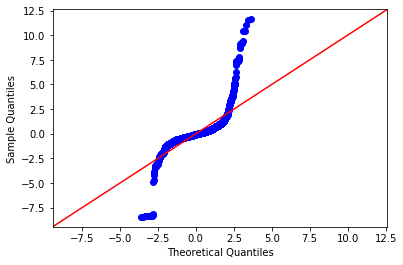

In [61]:
#using a Q-Q Plot from StatsModels
fig = sm.qqplot(model3.resid, line='45', fit=True)

## Check Homoscedasticity ##

In [62]:
len(model3.predict(train[x_cols]))

8152

In [63]:
len(model3.resid)

7084

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8152 entries, 7465 to 4927
Data columns (total 99 columns):
piece_count                                         8152 non-null float64
list_price                                          8152 non-null float64
num_reviews                                         7084 non-null float64
play_star_rating                                    8152 non-null float64
star_rating                                         8152 non-null float64
val_star_rating                                     8152 non-null float64
ages_10_14                                          8152 non-null uint8
ages_10_16                                          8152 non-null uint8
ages_10_21                                          8152 non-null uint8
ages_11_16                                          8152 non-null uint8
ages_12plus                                         8152 non-null uint8
ages_12_16                                          8152 non-null uint8
ages_14plus   

In [65]:
y_hat = train['list_price'] - model3.predict(train[x_cols])
len(y_hat)

8152

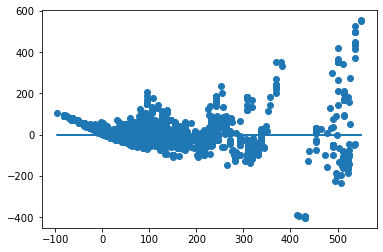

In [66]:
plt.scatter(model3.predict(train[x_cols]), y_hat)
plt.plot(model3.predict(train[x_cols]), [0 for i in range(len(train))])

In [67]:
#Remove outliers

train.describe()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10_14,ages_10_16,ages_10_21,ages_11_16,...,country_NO,country_NZ,country_PL,country_PT,country_US,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
count,8152.000000,8152.000000,7084.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,...,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000,8152.000000
mean,0.594678,68.125178,0.317891,0.911085,0.896245,0.888895,0.002331,0.013126,0.017296,0.005520,...,0.041953,0.047718,0.040972,0.046246,0.065260,0.093106,0.354882,0.002085,0.081575,0.162659
std,0.178244,96.166006,0.223687,0.099217,0.118593,0.106984,0.048224,0.113820,0.130381,0.074097,...,0.200494,0.213183,0.198236,0.210031,0.246999,0.290599,0.478507,0.045621,0.273733,0.369077
min,0.000000,2.272400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.512394,21.947800,0.117376,0.891668,0.852373,0.861353,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.606635,36.587800,0.303412,0.934536,0.918385,0.906288,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.708965,73.187800,0.446892,0.961555,0.980225,0.961555,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1104.870000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
std = train.describe().list_price['std']
median = train.describe().list_price['50%']
print(std)
print(median)

96.16600644823507
36.5878


In [69]:
max_value = median + std*2
max_value

228.91981289647015

In [70]:
train_new = train[train['list_price']<max_value]
train_new.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10_14,ages_10_16,ages_10_21,ages_11_16,...,country_NO,country_NZ,country_PL,country_PT,country_US,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
7465,0.549419,12.1878,0.000000,0.000000,0.781585,0.682606,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4139,0.364926,32.9278,0.117376,1.000000,1.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2363,0.604625,15.5922,0.329516,0.906288,0.805755,0.906288,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
151,0.518024,9.9900,0.000000,0.861353,0.781585,0.861353,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2451,0.497603,10.1322,0.117376,1.000000,1.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
#remove outliers from test set 
test_new = test[test['list_price']<max_value]


In [72]:
model4 = ols(formula=formula, data=train_new).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     497.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:29:02   Log-Likelihood:                -29979.
No. Observations:                6677   AIC:                         6.006e+04
Df Residuals:                    6628   BIC:                         6.039e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           68.0716      3.430     19.845      0.000      61.348      74.796
piece_count                                        175.7006      2.791     62.947      0.000     170.229     181.172
num_reviews                                         30.2579      1.689     17.914      0.000      26.947      33.569
play_star_rating                                    44.1857      3.279     13.474      0.000      37.757      50.614
val_star_rating                                    -71.6484      2.845    -25.185      0.000     -77.225     -66.072
ages_10_14                                        -119.5245      5.558    -21.504      0.000    -130.421    -108.628
ages_10_16                                         -68.1587      3.242    -21.025      0.000     -74.514     -61.804
ages_11_16                                         -27.2936      4.761     -5.733      0.000     -36.626     -17.961
ages_12plus                                         41.4124      4.720      8.774      0.000      32.160      50.664
ages_12_16                                         -16.5081      6.184     -2.669      0.008     -28.631      -4.385
ages_16plus                                         95.0679      7.564     12.568      0.000      80.239     109.897
ages_1half_3                                       -21.9795      3.091     -7.111      0.000     -28.039     -15.920
ages_1half_5                                       -22.5814      2.512     -8.990      0.000     -27.506     -17.657
ages_2_5                                           -10.6045      1.632     -6.497      0.000     -13.804      -7.405
ages_4_7                                           -36.4350      2.098    -17.371      0.000     -40.547     -32.323
ages_4_99                                          -46.6354      5.709     -8.168      0.000     -57.827     -35.443
ages_5plus                                         -48.1472      2.287    -21.049      0.000     -52.631     -43.663
ages_5_12                                         -113.9159      2.390    -47.659      0.000    -118.602    -109.230
ages_5_8                                           -33.5531      3.598     -9.326      0.000     -40.606     -26.500
ages_6plus                                        -116.9467      3.849    -30.383      0.000    -124.492    -109.401
ages_6_12                                         -112.0225      2.384    -46.993      0.000    -116.695    -107.349
ages_6_14                                         -108.3422      3.485    -31.087      0.000    -115.174    -101.510
ages_7plus                                       -7.902e-14   7.32e-15    -10.788      0.000   -9.34e-14   -6.47e-14
ages_7_12                                

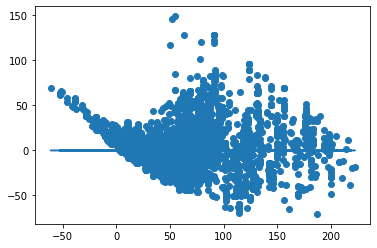

In [73]:
#Check homoskedacticity again

y_hat_new = train_new['list_price'] - model4.predict(train_new[x_cols])

plt.scatter(model4.predict(train_new[x_cols]), y_hat_new)
plt.plot(model4.predict(train_new[x_cols]), [0 for i in range(len(train_new))])

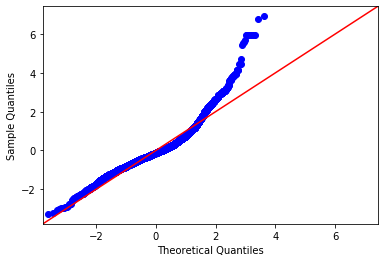

In [74]:
#Check normality again

fig = sm.qqplot(model4.resid, line='45', fit=True)

In [75]:
# Try and fix normality by taking log of continuous variables

#We ran the following code below and then chose to return to the start of our notebook to take the logs at the beginning:
#Code below is shown to explain our process

# continuous = ['play_star_rating', 'val_star_rating', 'piece_count']
# train_log = train.copy()
# test_log = test.copy()

# for col in continuous:
#     train_log[col] = train_log[col].map(lambda x: np.log(x))
#     test_log[col] = test_log[col].map(lambda x: np.log(x))

In [79]:
# model5 = ols(formula=formula, data=train_log).fit()
# model5.summary()